In [1]:
%store -r df_stream 

In [2]:
import pandas as pd
import numpy as np
import requests
import os
from dotenv import load_dotenv

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [10]:
# Filter data to find only this years' streams

filtered_df = df_stream.loc[(df_stream['Time'] >= '2023-01-01')]

# removing the 'spotify:track:' from the track_uri to be easier to loop through them
filtered_df.loc[:,'trackUri'] = filtered_df['trackUri'].str.replace('spotify:track:', '')
filtered_df.head()

C:\Users\Ana Luiza\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,trackName,artistName,albumName,trackUri,UniqueID,Time,year,month,weekday,day-name,Count,Time-Played (hh:mm:ss),Minutes Listening
13337,Paradise,BTS,Love Yourself 轉 'Tear',1YO4xJXhh9A1Feg9k8xuy2,BTS:Paradise,2023-01-01 16:11:23+00:00,2023,1,6,Sunday,1,0 days 00:00:00.981000,0.016
13338,Stay,BTS,Proof,5YbEHfUUvXsUsg7qNYXUpP,BTS:Stay,2023-01-01 16:11:23+00:00,2023,1,6,Sunday,1,0 days 00:00:00.504000,0.008
13339,Somebody To Love Remix,Justin Bieber,Never Say Never - The Remixes,7IUl5c6u18rzmyQOblj10T,Justin Bieber:Somebody To Love Remix,2023-01-01 16:11:25+00:00,2023,1,6,Sunday,1,0 days 00:00:00.023000,0.000
13340,FEARLESS,LE SSERAFIM,FEARLESS,296nXCOv97WJNRWzIBQnoj,LE SSERAFIM:FEARLESS,2023-01-01 16:14:12+00:00,2023,1,6,Sunday,1,0 days 00:02:48.437000,2.807
13341,All The Things She Said,Poppy,All The Things She Said,0wH55ChKuoZkmGhbIYtOI4,Poppy:All The Things She Said,2023-01-01 16:14:49+00:00,2023,1,6,Sunday,1,0 days 00:00:35.340000,0.589


In [12]:
# dropping unnecessary columns to this analysis
filtered_df = filtered_df.drop(['Time','year','month','weekday','day-name','Time-Played (hh:mm:ss)'], axis=1)

# even after filtered, the filtered_df is too big to loop through efficiently
# therefore, I'm currently trying to reduce its size 
# by grouping it based on the UniqueID column.
filtered_df = filtered_df.groupby('UniqueID').agg({
    'artistName': 'first',
    'albumName': 'first',
    'trackUri': 'first',
    'trackName': 'first',
    'Count': 'sum',
    'Minutes Listening': 'sum'
}).reset_index()

filtered_df.head(20)


,UniqueID,artistName,albumName,trackUri,trackName,Count,Minutes Listening
0,(G)I-DLE:HANN (Alone),(G)I-DLE,HANN (Alone),7gr57cYekMWriyJYbT7oZ4,HANN (Alone),5,3.099
1,(G)I-DLE:LION,(G)I-DLE,I trust,40OyiVO9NtBg9R2Gpwxs3u,LION,3,0.101
2,(G)I-DLE:Oh my god,(G)I-DLE,I trust,2DmRXiyn03tOqKgEJXlaiJ,Oh my god,8,3.412
3,(G)I-DLE:TOMBOY,(G)I-DLE,I NEVER DIE,0IGUXY4JbK18bu9oD4mPIm,TOMBOY,8,6.720
4,*NSYNC:Bye Bye Bye,*NSYNC,No Strings Attached,4r8lRYnoOGdEi6YyI5OC1o,Bye Bye Bye,4,0.051
5,*NSYNC:It's Gonna Be Me,*NSYNC,No Strings Attached,2AW37v0bDyuOzGP3XnmFuA,It's Gonna Be Me,9,4.723
6,220 KID:Look Where We Are,220 KID,Look Where We Are,4I3kvtjNBcJWI7H9bszT75,Look Where We Are,1,3.200
7,"2am:Love U, Hate U (Feat. 방탄소년단)",2am,Saint O'clock,2GAqePxIWf5BXTQ28Xp0Vu,"Love U, Hate U (Feat. 방탄소년단)",1,0.149
8,347aidan:IDONTWANNATALKTOYOU! (with renforshort),347aidan,CHASING HARMONY,39LAVN7bpAOvpCwA06dvWZ,IDONTWANNATALKTOYOU! (with renforshort),1,0.793
9,3LAU:Touch - Zeds Dead Remix,3LAU,Ultraviolet,0yZ28PYGX5F8CWEp64Xl7E,Touch - Zeds Dead Remix,2,0.020


In [21]:
# to make it even easier I'm using only the songs I heard more than 10 times

df_count_streams = filtered_df[filtered_df['Count'] > 10 ]

df_count_streams.head(20)

,UniqueID,artistName,albumName,trackUri,trackName,Count,Minutes Listening
23,5 Seconds of Summer:Everything I Didn't Say,5 Seconds of Summer,5 Seconds Of Summer,1fp5JWXd8RbJDnKrFXxYP0,Everything I Didn't Say,13,6.223
33,5 Seconds of Summer:Never Be,5 Seconds of Summer,5 Seconds Of Summer,6hPCeM0qIAk0N3Ko8UQ1tN,Never Be,14,5.140
34,5 Seconds of Summer:Over And Out,5 Seconds of Summer,She's Kinda Hot,6xO74pVBVSHoPsphd7btHK,Over And Out,11,12.173
43,5 Seconds of Summer:Voodoo Doll,5 Seconds of Summer,5 Seconds Of Summer,3sTpgVvp9dotoynnzRUuaS,Voodoo Doll,12,14.839
50,A Day To Remember:Since U Been Gone,A Day To Remember,For Those Who Have Heart,45oBSaWml0fU1S6qcHcpxF,Since U Been Gone,13,8.200
53,AMiR:Easy (Optixx Remix),AMiR,Easy (Optixx Remix),7EW6TtHJIa2zyydF6dwNBs,Easy (Optixx Remix),15,29.373
69,ASTRO:Crazy Sexy Cool,ASTRO,Dream Part.02,4hKhWLyYwCmugcMP8vbr7s,Crazy Sexy Cool,13,37.946
104,Against The Current:Gravity,Against The Current,Gravity,1MAtUmZaUGsbS8hH335A0e,Gravity,13,10.652
105,Against The Current:Infinity,Against The Current,Infinity,4TJm8X1IrngREA84YHPz5G,Infinity,13,7.452
107,Against The Current:Running with the Wild Things,Against The Current,In Our Bones,30vl7nX9kTYZRfr7kTi0jU,Running with the Wild Things,12,6.748


In [23]:
# final size
print(len(df_count_streams))

637


In [24]:
# get my spotify's clientID and clientSecret from the env variables
load_dotenv()

CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET = os.getenv('CLIENT_SECRET')

In [25]:
# authentication URL
AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

# used for authenticating all API calls
headers = {'Authorization': 'Bearer {token}'.format(token=access_token)}
# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'
print('OK')

OK


In [27]:
# create blank dictionary to store track URI, artist URI, and genres
dict_genre = {}

# convert trackUri column to an iterable list
track_uris = df_count_streams['trackUri'].to_list()

# loop through track URIs and pull artist URI using the API,
# then use artist URI to pull genres associated with that artist
# store all these in a dictionary
for t_uri in track_uris:
    
    dict_genre[t_uri] = {'artist_uri': "", "genres":[]}
    if t_uri is not None:
        r = requests.get('https://api.spotify.com/v1/tracks/' + t_uri, headers=headers)
        if r.status_code == 200:
            r_json = r.json()
            if 'artists' in r_json and r_json['artists']:
                a_uri = r_json['artists'][0]['uri'].split(':')[2]
                dict_genre[t_uri]['artist_uri'] = a_uri

                s = requests.get(BASE_URL + 'artists/' + a_uri, headers=headers)
            
                if s.status_code == 200:
                    s_json = s.json()
                    dict_genre[t_uri]['genres'] = s_json['genres']
                    #print(dict_genre[t_uri]['genres'])
                else:
                    print(f"Failed to fetch artist info for track URI: {t_uri}")
                 
            else:
                print(f"No artists found for track URI: {t_uri}")
        else:
            print(f"Failed to fetch track details for URI: {t_uri}")
               
print('OK')

['alt z']
['cloud rap', 'emo rap']
['k-pop', 'k-rap']
['k-pop', 'k-rap']
['k-pop', 'k-rap']
['k-pop', 'k-rap']
['k-pop', 'k-rap']
['k-pop', 'k-rap']
['alt z', 'pov: indie']
['alt z']
['pop']
['complextro', 'edm', 'german techno', 'pop', 'pop dance']
['complextro', 'edm', 'german techno', 'pop', 'pop dance']
['pop', 'scandipop', 'swedish electropop', 'swedish pop']
['future funk']
['british indie rock', 'modern rock', 'pov: indie', 'rock']
['brighton indie', 'modern alternative rock']
['k-pop']
[]
['neon pop punk', 'pixie', 'pop punk', 'pov: indie', 'texas pop punk']
['k-pop']
['atl hip hop', 'contemporary r&b', 'dance pop', 'pop', 'r&b', 'rap', 'south carolina hip hop', 'urban contemporary']
['alt z', 'modern indie pop']
['alt z', 'modern indie pop']
['alt z', 'modern indie pop']
['alt z', 'modern indie pop']
['alt z', 'modern indie pop']
['alt z', 'modern indie pop']
['downtempo', 'electronica', 'indietronica', 'intelligent dance music']
['modern rock', 'pop', 'pov: indie', 'rock']
['

['girl group', 'pop', 'talent show', 'uk pop']
['girl group', 'pop', 'talent show', 'uk pop']
['girl group', 'pop', 'talent show', 'uk pop']
['girl group', 'pop', 'talent show', 'uk pop']
['girl group', 'pop', 'talent show', 'uk pop']
['girl group', 'pop', 'talent show', 'uk pop']
['girl group', 'pop', 'talent show', 'uk pop']
['girl group', 'pop', 'talent show', 'uk pop']
['girl group', 'pop', 'talent show', 'uk pop']
['alternative metal', 'nu metal', 'post-grunge', 'rap metal', 'rock']
['dance pop', 'electropop']
['lgbtq+ hip hop']
['dark r&b']
['art pop', 'pop']
['art pop', 'pop']
['art pop', 'pop']
['art pop', 'pop']
['art pop', 'pop']
['art pop', 'pop']
['art pop', 'pop']
['art pop', 'pop']
['art pop', 'pop']
['art pop', 'pop']
['k-pop girl group']
['k-pop girl group']
['slap house']
['edm', 'pop', 'pop dance', 'tropical house']
['pop', 'r&b', 'rap']
['pop']
['k-pop']
['k-pop']
['k-pop']
['k-pop']
['k-pop']
['k-pop']
['k-pop']
['k-pop']
['k-pop']
['k-pop']
['k-pop']
['escape room'

['rebel blues']
[]
['meme']
['argentine hip hop', 'pop venezolano', 'trap argentino', 'trap latino', 'urbano latino']
['k-pop']
['art pop', 'electropop', 'pop']
['boy band', 'pop', 'post-teen pop']
['boy band', 'pop', 'post-teen pop']
['pop', 'r&b']
['pop', 'r&b']
['latin pop', 'latin viral pop', 'rap latina', 'reggaeton', 'urbano latino']
['pop']
['k-rap']
['boy band', 'dance pop', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'pop']
['k-pop', 'k-pop boy group', 'p

In [34]:
# converting the dictionary on a dataframe
df_genre = pd.DataFrame.from_dict(dict_genre, orient='index')
df_genre.reset_index(inplace=True)
df_genre.columns = ['trackUri', 'artist_uri', 'genres']
df_genre.head()

,trackUri,artist_uri,genres
0,1MXfyXi4OdU0WMhgZM6tLR,0MGJHTThvyAyqKuEAgPqDr,[alt z]
1,7CGz9zQ07qHQbqMemymj1h,7FngGIEGgN3Iwauw1MvO4P,"[cloud rap, emo rap]"
2,2jk6oBuLiCZJTDWhlJEzIw,0b1sIQumIAsNbqAoIClSpy,"[k-pop, k-rap]"
3,00I41xsW6SunZDJ5fB8KAd,0b1sIQumIAsNbqAoIClSpy,"[k-pop, k-rap]"
4,1XIIvx9S19CZVc7eow7EX7,0b1sIQumIAsNbqAoIClSpy,"[k-pop, k-rap]"


In [36]:
# and merging it with the original data
merged_df = pd.merge(df_count_streams, df_genre, on='trackUri', how='left')

merged_df.head()

,UniqueID,artistName,albumName,trackUri,trackName,Count,Minutes Listening,artist_uri,genres
0,phem:flowers,phem,flowers,1MXfyXi4OdU0WMhgZM6tLR,flowers,11,3.227,0MGJHTThvyAyqKuEAgPqDr,[alt z]
1,"nothing,nowhere.:Pieces of You","nothing,nowhere.",Pieces of You,7CGz9zQ07qHQbqMemymj1h,Pieces of You,13,4.225,7FngGIEGgN3Iwauw1MvO4P,"[cloud rap, emo rap]"
2,j-hope:Airplane,j-hope,Hope World,2jk6oBuLiCZJTDWhlJEzIw,Airplane,13,0.114,0b1sIQumIAsNbqAoIClSpy,"[k-pop, k-rap]"
3,j-hope:Safety Zone,j-hope,Jack In The Box,00I41xsW6SunZDJ5fB8KAd,Safety Zone,11,2.839,0b1sIQumIAsNbqAoIClSpy,"[k-pop, k-rap]"
4,j-hope:STOP,j-hope,Jack In The Box,1XIIvx9S19CZVc7eow7EX7,STOP,12,2.394,0b1sIQumIAsNbqAoIClSpy,"[k-pop, k-rap]"


In [37]:
# expand the genres column
df_genre_expanded = merged_df.explode('genres')
df_genre_expanded.head()

,UniqueID,artistName,albumName,trackUri,trackName,Count,Minutes Listening,artist_uri,genres
0,phem:flowers,phem,flowers,1MXfyXi4OdU0WMhgZM6tLR,flowers,11,3.227,0MGJHTThvyAyqKuEAgPqDr,alt z
1,"nothing,nowhere.:Pieces of You","nothing,nowhere.",Pieces of You,7CGz9zQ07qHQbqMemymj1h,Pieces of You,13,4.225,7FngGIEGgN3Iwauw1MvO4P,cloud rap
1,"nothing,nowhere.:Pieces of You","nothing,nowhere.",Pieces of You,7CGz9zQ07qHQbqMemymj1h,Pieces of You,13,4.225,7FngGIEGgN3Iwauw1MvO4P,emo rap
2,j-hope:Airplane,j-hope,Hope World,2jk6oBuLiCZJTDWhlJEzIw,Airplane,13,0.114,0b1sIQumIAsNbqAoIClSpy,k-pop
2,j-hope:Airplane,j-hope,Hope World,2jk6oBuLiCZJTDWhlJEzIw,Airplane,13,0.114,0b1sIQumIAsNbqAoIClSpy,k-rap


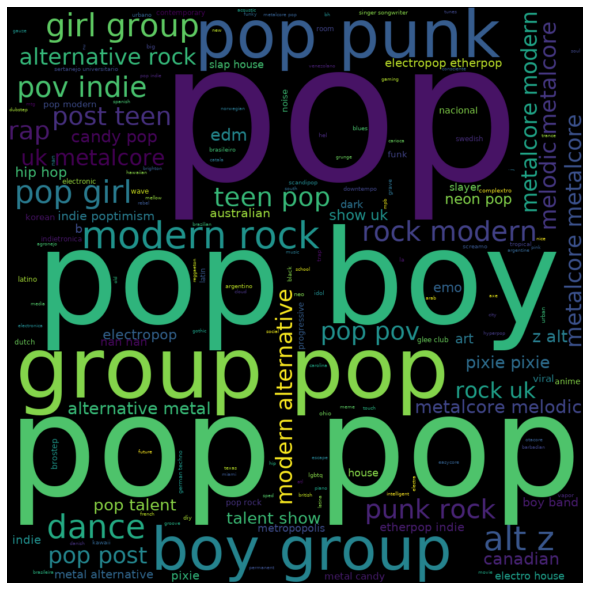

In [51]:
# creating a WordCloud from all genres

# concatenate all genres into a single string
comment_words = ' '.join(df_genre_expanded['genres'].astype(str))

font_path = 'DejaVuSans.ttf'
wordcloud = WordCloud(width=1000, height=1000, background_color='black', font_path=font_path).generate(comment_words)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()



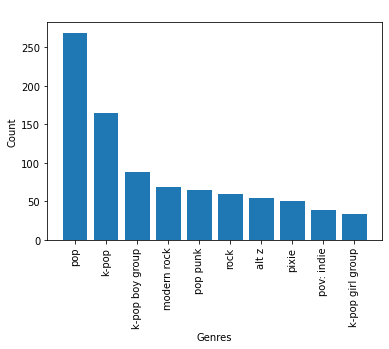

In [58]:
# creating a top10 genres bar plot
genre_counts = df_genre_expanded['genres'].value_counts()
top_10_genres = genre_counts.head(10)
plt.bar(top_10_genres.index, top_10_genres.values)


plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 10 Genres Count', color='white')

plt.xticks(rotation=90)

plt.show()